In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

TRAIN DATA PREPROCESSING

In [ ]:
train_data = pd.read_csv('/content/train_LZdllcl.csv.xls')

In [ ]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
train_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [ ]:
train_data.isna().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [ ]:
train_data = train_data.drop(['region','recruitment_channel','no_of_trainings','previous_year_rating'],axis=1)

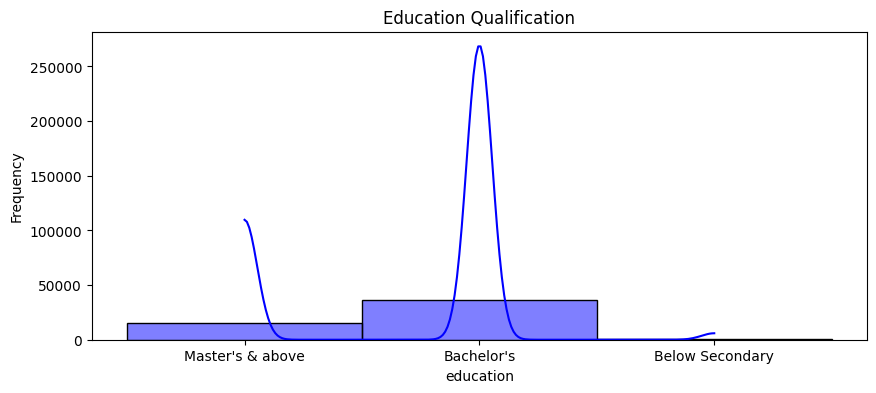

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(train_data['education'], kde=True, bins=30, color='blue')
plt.title('Education Qualification')
plt.xlabel('education')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['education_enco'] = le.fit_transform(train_data['education'])

In [ ]:
train_data['education_enco'] = train_data['education_enco'].fillna(train_data['education_enco'].mean())

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['gender1'] = le.fit_transform(train_data['gender'])
train_data['department1'] = le.fit_transform(train_data['department'])


In [ ]:
train_data = train_data.drop(['education','department','gender'],axis=1)

In [ ]:
train_data.head()

,employee_id,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,education_enco,gender1,department1
0,65438,35,8,1,0,49,0,2,0,7
1,65141,30,4,0,0,60,0,0,1,4
2,7513,34,7,0,0,50,0,0,1,7
3,2542,39,10,0,0,50,0,0,1,7
4,48945,45,2,0,0,73,0,0,1,8


In [ ]:
x = train_data.drop('is_promoted',axis=1)
y = train_data['is_promoted']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_val)

In [ ]:
y_pred = rf_model.predict(x_val)

In [ ]:
x_pred = rf_model.predict(x_train)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
x_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy is', accuracy_score(y_val, y_pred))
print('Precision is', precision_score(y_val, y_pred))
print('Recall is', recall_score(y_val, y_pred))
print('f1 score is', f1_score(y_val,y_pred))

Accuracy is 0.9402481299033023
Precision is 0.8484848484848485
Recall is 0.3392070484581498
f1 score is 0.4846577498033045


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'n_estimators': [100, 200, 300],'max_depth': [10, 20, None]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, None],
                         'n_estimators': [100, 200, 300]})

In [ ]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'n_estimators': 200}


In [ ]:
best_model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
best_model.fit(x, y)

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

TEST DATA PREPROCESSING

In [ ]:
test_data = pd.read_csv('/content/test_2umaH9m.csv.xls')

In [ ]:
test_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [ ]:
test_data.isna().sum()

,0
employee_id,0
department,0
region,0
education,1034
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,1812
length_of_service,0


In [ ]:
test_data = test_data.drop(['region','recruitment_channel','no_of_trainings','previous_year_rating'],axis=1)

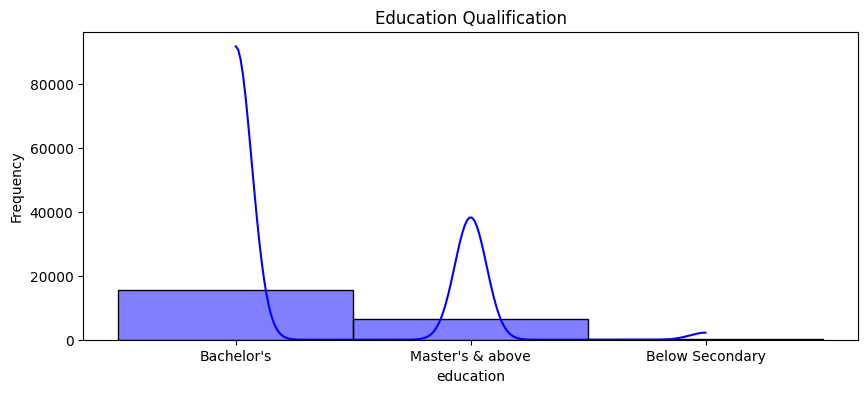

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(test_data['education'], kde=True, bins=30, color='blue')
plt.title('Education Qualification')
plt.xlabel('education')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test_data['education_enco'] = le.fit_transform(test_data['education'])

In [ ]:
test_data['education_enco'] = test_data['education_enco'].fillna(test_data['education_enco'].median)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test_data['gender1'] = le.fit_transform(test_data['gender'])
test_data['department1'] = le.fit_transform(test_data['department'])

In [ ]:
test_data = test_data.drop(['education','gender','department'],axis=1)

In [ ]:
test_data.head()

,employee_id,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,education_enco,gender1,department1
0,8724,24,1,1,0,77,0,1,8
1,74430,31,5,0,0,51,0,0,2
2,72255,31,4,0,0,47,0,1,7
3,38562,31,9,0,0,65,0,0,5
4,64486,30,7,0,0,61,0,1,1


In [ ]:
test_predictions = best_model.predict(test_data)

In [ ]:
sample_data = pd.read_csv('/content/sample_submission_M0L0uXE.csv.xls')

In [ ]:
submission = sample_data.copy()
submission["is_promoted"] = test_predictions
submission.to_csv("submission.csv", index=False)

In [ ]:
from google.colab import files

train_data.to_csv("data.csv", index=False)
files.download("data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

test_data.to_csv("data.csv", index=False)
files.download("data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
submission["is_promoted"] = test_predictions

In [ ]:
submission.to_csv("submission_updated.csv", index=False)
files.download("submission_updated.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>